In [1]:
# Imports

#Numpy
import numpy as np
#Pandas
import pandas as pd
#Matplotib
import matplotlib.pyplot as plt
# Seaborn
import seaborn as sns
# Hypothesis Testing 
import scipy.stats as stats

from statsmodels.stats.multicomp import pairwise_tukeyhsd


## Filter ALL warnings
import warnings
warnings.filterwarnings('ignore')

# Load & Clean

In [2]:
df = pd.read_csv('Data/combined_tmdb_data.csv.gz',lineterminator='\n')
df.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.500,22.0,NaN
1,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,5.100,8.0,NaN
2,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,...,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,4.000,1.0,NaN
3,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,"{'id': 1131062, 'name': 'Wong Kar-Wai’s Love T...",150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,843.0,cn,花樣年華,...,14204632.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.112,2245.0,PG
4,tt0118852,0.0,/vceiGZ3uavAEHlTA7v0GjQsGVKe.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",NaN,49511.0,en,Chinese Coffee,...,0.0,99.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,There's a fine line between friendship and bet...,Chinese Coffee,0.0,6.800,50.0,R


## Dropping Unnecessary Columns

In [3]:
## Columns to exclude
drop_cols = ['backdrop_path','backdrop_path','original_title','overview',
                 'poster_path','status','tagline','id','homepage',
                 'production_countries','video','production_companies','spoken_languages',
            'original_language']
df = df.drop(columns=drop_cols)
df.head()

,imdb_id,adult,belongs_to_collection,budget,genres,popularity,release_date,revenue,runtime,title,vote_average,vote_count,certification
0,tt0113026,0.0,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",3.004,2000-09-22,0.0,86.0,The Fantasticks,5.500,22.0,NaN
1,tt0113092,0.0,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",1.678,2000-11-15,0.0,100.0,For the Cause,5.100,8.0,NaN
2,tt0116391,0.0,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",0.930,2000-04-14,0.0,152.0,Gang,4.000,1.0,NaN
3,tt0118694,0.0,"{'id': 1131062, 'name': 'Wong Kar-Wai’s Love T...",150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",24.758,2000-09-29,14204632.0,99.0,In the Mood for Love,8.112,2245.0,PG
4,tt0118852,0.0,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",4.001,2000-09-02,0.0,99.0,Chinese Coffee,6.800,50.0,R


## Cleaning 'belongs_to_collection' column

In [4]:
df['belongs_to_collection'].value_counts()

{'id': 148065, 'name': 'Doraemon Collection', 'poster_path': '/4TLSP1KD1uAlp2q1rTrc6SFlktX.jpg', 'backdrop_path': '/rc6OFcSasL5YxBRPUQVwxmVF6h5.jpg'}             16
{'id': 39199, 'name': 'Detective Conan Collection', 'poster_path': '/1wBfr532NOQK68wlo5ApjCmiQIB.jpg', 'backdrop_path': '/9bogrpii4e61SR6a9qLHow7I46U.jpg'}       16
{'id': 403643, 'name': 'Troublesome Night Collection', 'poster_path': '/bPTx3TP4UJTHQfcLx4qIub9LXmi.jpg', 'backdrop_path': '/n3a7zF5GuxM2X8oPF6pKXqYS6ER.jpg'}    15
{'id': 534673, 'name': 'Madea - Collection', 'poster_path': '/bO9NvwpSElW8lp33fGyy8VaS5s9.jpg', 'backdrop_path': '/qxLbjNPrMKTgYrMhIIDzj4zgYjf.jpg'}              11
{'id': 23616, 'name': 'Naruto Collection', 'poster_path': '/q9rrfRgPUFkFqDF74jlvNYp3RpN.jpg', 'backdrop_path': '/prLI2SNNkd9wcQkFh9iWXzQtR5D.jpg'}                11
                                                                                                                                                                  ..
{'id': 946

In [5]:
# Use .notna() to get True if it belongs to a collection
df['belongs_to_collection'] = df['belongs_to_collection'].notna()
df['belongs_to_collection'].value_counts()

False    56488
True      3756
Name: belongs_to_collection, dtype: int64

## Cleaning/Expanding 'genres' column 

In [6]:
## Function to get just the genre names as a list 
import json
def get_genre_name(x):
    x = x.replace("'",'"')
    x = json.loads(x)
    
    genres = []
    for genre in x:
        genres.append(genre['name'])
    return genres

In [7]:
# Use our function on our test case
get_genre_name(df.loc[0,'genres'])

['Comedy', 'Music', 'Romance']

In [8]:
## Use our function and exploding the new column
df['genres_list'] = df['genres'].apply(get_genre_name)
df_explode = df.explode('genres_list')
df_explode.head()

,imdb_id,adult,belongs_to_collection,budget,genres,popularity,release_date,revenue,runtime,title,vote_average,vote_count,certification,genres_list
0,tt0113026,0.0,False,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",3.004,2000-09-22,0.0,86.0,The Fantasticks,5.5,22.0,NaN,Comedy
0,tt0113026,0.0,False,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",3.004,2000-09-22,0.0,86.0,The Fantasticks,5.5,22.0,NaN,Music
0,tt0113026,0.0,False,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",3.004,2000-09-22,0.0,86.0,The Fantasticks,5.5,22.0,NaN,Romance
1,tt0113092,0.0,False,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",1.678,2000-11-15,0.0,100.0,For the Cause,5.1,8.0,NaN,Science Fiction
2,tt0116391,0.0,False,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",0.930,2000-04-14,0.0,152.0,Gang,4.0,1.0,NaN,Drama


In [9]:
# save unique genres
unique_genres = df_explode['genres_list'].dropna().unique()
unique_genres

array(['Comedy', 'Music', 'Romance', 'Science Fiction', 'Drama', 'Action',
       'Crime', 'Adventure', 'Animation', 'Fantasy', 'Horror', 'Thriller',
       'History', 'Family', 'Mystery', 'Western', 'War', 'TV Movie',
       'Documentary'], dtype=object)

In [10]:
# One-Hot-Encode Genres
for genre in unique_genres:
    df[f"Genre_{genre}"] = df['genres'].str.contains(genre,regex=False)    
df.head()

,imdb_id,adult,belongs_to_collection,budget,genres,popularity,release_date,revenue,runtime,title,...,Genre_Fantasy,Genre_Horror,Genre_Thriller,Genre_History,Genre_Family,Genre_Mystery,Genre_Western,Genre_War,Genre_TV Movie,Genre_Documentary
0,tt0113026,0.0,False,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",3.004,2000-09-22,0.0,86.0,The Fantasticks,...,False,False,False,False,False,False,False,False,False,False
1,tt0113092,0.0,False,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",1.678,2000-11-15,0.0,100.0,For the Cause,...,False,False,False,False,False,False,False,False,False,False
2,tt0116391,0.0,False,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",0.930,2000-04-14,0.0,152.0,Gang,...,False,False,False,False,False,False,False,False,False,False
3,tt0118694,0.0,True,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",24.758,2000-09-29,14204632.0,99.0,In the Mood for Love,...,False,False,False,False,False,False,False,False,False,False
4,tt0118852,0.0,False,0.0,"[{'id': 18, 'name': 'Drama'}]",4.001,2000-09-02,0.0,99.0,Chinese Coffee,...,False,False,False,False,False,False,False,False,False,False


In [11]:
## Drop original genre cols
df = df.drop(columns=['genres','genres_list'])
df.head()

,imdb_id,adult,belongs_to_collection,budget,popularity,release_date,revenue,runtime,title,vote_average,...,Genre_Fantasy,Genre_Horror,Genre_Thriller,Genre_History,Genre_Family,Genre_Mystery,Genre_Western,Genre_War,Genre_TV Movie,Genre_Documentary
0,tt0113026,0.0,False,10000000.0,3.004,2000-09-22,0.0,86.0,The Fantasticks,5.500,...,False,False,False,False,False,False,False,False,False,False
1,tt0113092,0.0,False,0.0,1.678,2000-11-15,0.0,100.0,For the Cause,5.100,...,False,False,False,False,False,False,False,False,False,False
2,tt0116391,0.0,False,0.0,0.930,2000-04-14,0.0,152.0,Gang,4.000,...,False,False,False,False,False,False,False,False,False,False
3,tt0118694,0.0,True,150000.0,24.758,2000-09-29,14204632.0,99.0,In the Mood for Love,8.112,...,False,False,False,False,False,False,False,False,False,False
4,tt0118852,0.0,False,0.0,4.001,2000-09-02,0.0,99.0,Chinese Coffee,6.800,...,False,False,False,False,False,False,False,False,False,False


## Creating Separate Columns for 'release_date'

In [12]:
## view value_counts()
df['release_date'].value_counts()

2009-01-01    265
2010-01-01    244
2008-01-01    232
2011-01-01    209
2012-01-01    187
             ... 
2006-01-15      1
2004-07-12      1
2011-05-28      1
2011-03-07      1
2022-08-31      1
Name: release_date, Length: 7644, dtype: int64

In [13]:
## split release date into 3 columns
new_cols = ['year','month','day']
df[new_cols] = df['release_date'].str.split('-',expand=True)
df[new_cols] = df[new_cols].astype(float)
df.head()

,imdb_id,adult,belongs_to_collection,budget,popularity,release_date,revenue,runtime,title,vote_average,...,Genre_History,Genre_Family,Genre_Mystery,Genre_Western,Genre_War,Genre_TV Movie,Genre_Documentary,year,month,day
0,tt0113026,0.0,False,10000000.0,3.004,2000-09-22,0.0,86.0,The Fantasticks,5.500,...,False,False,False,False,False,False,False,2000.0,9.0,22.0
1,tt0113092,0.0,False,0.0,1.678,2000-11-15,0.0,100.0,For the Cause,5.100,...,False,False,False,False,False,False,False,2000.0,11.0,15.0
2,tt0116391,0.0,False,0.0,0.930,2000-04-14,0.0,152.0,Gang,4.000,...,False,False,False,False,False,False,False,2000.0,4.0,14.0
3,tt0118694,0.0,True,150000.0,24.758,2000-09-29,14204632.0,99.0,In the Mood for Love,8.112,...,False,False,False,False,False,False,False,2000.0,9.0,29.0
4,tt0118852,0.0,False,0.0,4.001,2000-09-02,0.0,99.0,Chinese Coffee,6.800,...,False,False,False,False,False,False,False,2000.0,9.0,2.0


In [14]:
## drop original feature
df = df.drop(columns=['release_date'])
df.head()

,imdb_id,adult,belongs_to_collection,budget,popularity,revenue,runtime,title,vote_average,vote_count,...,Genre_History,Genre_Family,Genre_Mystery,Genre_Western,Genre_War,Genre_TV Movie,Genre_Documentary,year,month,day
0,tt0113026,0.0,False,10000000.0,3.004,0.0,86.0,The Fantasticks,5.500,22.0,...,False,False,False,False,False,False,False,2000.0,9.0,22.0
1,tt0113092,0.0,False,0.0,1.678,0.0,100.0,For the Cause,5.100,8.0,...,False,False,False,False,False,False,False,2000.0,11.0,15.0
2,tt0116391,0.0,False,0.0,0.930,0.0,152.0,Gang,4.000,1.0,...,False,False,False,False,False,False,False,2000.0,4.0,14.0
3,tt0118694,0.0,True,150000.0,24.758,14204632.0,99.0,In the Mood for Love,8.112,2245.0,...,False,False,False,False,False,False,False,2000.0,9.0,29.0
4,tt0118852,0.0,False,0.0,4.001,0.0,99.0,Chinese Coffee,6.800,50.0,...,False,False,False,False,False,False,False,2000.0,9.0,2.0


## Cleaning 'certification' column values

In [15]:
## Checking Certification values counts
df['certification'].value_counts(dropna=False)

NaN                                45593
R                                   6114
NR                                  3269
PG-13                               3226
PG                                  1432
G                                    443
NC-17                                156
Unrated                                5
UR                                     1
Not Rated                              1
ScreamFest Horror Film Festival        1
R                                      1
PG-13                                  1
10                                     1
Name: certification, dtype: int64

In [16]:
# fix extra space in PG-13
df['certification'] = df['certification'].str.strip()

In [17]:
## Clean certification column values
repl_cert = {'UR':'NR',
             'Not Rated':'NR',
             'Unrated':'NR',
             '-':'NR',
             '10':np.nan,
             'ScreamFest Horror Film Festival':'NR'}
df['certification'] = df['certification'].replace(repl_cert)
df['certification'].value_counts(dropna=False)

NaN      45594
R         6115
NR        3277
PG-13     3227
PG        1432
G          443
NC-17      156
Name: certification, dtype: int64

## Removing 0.0 from 'revenue'

In [18]:
# Drop '0.0' values form "revenue" column
df.drop(df.index[df['revenue'] == 0.0], inplace = True)
# Confirm drop
df['revenue'].value_counts().sort_values()

132675864.0     1
9902115.0       1
19125401.0      1
215663859.0     1
8694320.0       1
               ..
12000000.0     13
1000000.0      16
100000.0       17
2000000.0      18
10000.0        30
Name: revenue, Length: 6952, dtype: int64

# Hypothesis Testing

## Question One: (ANOVA)
Does the MPAA rating of a movie (G/PG/PG-13/R) affect how much revenue the movie generates?

Hypothesis Testing Statements:
- Null Hypothesis: There is no significant difference in revenue for MPAA movie ratings.

- Alternative Hypothesis: There is a significant difference in revenue for MPAA movie ratings. 

Hypothesis Test:
- alpha = 0.05
- ANOVA test because the are more than two MPAA ratings and the revenue we are testing is numeric.
    - To see which samples hold significance, we will use; statsmodels.stats.multicomp.pairwise_tukeyhsd
- Assumptions: No Outliers, Normality and Equal Variance
    - If assumptions fail: use kruskal test; stats.kruskal()

In [19]:
# Drop nan values
df = df.dropna(subset=["certification"])

In [20]:
# MPAA Ratings in 'certification' column
mpaa_ratings = df['certification'].unique()
mpaa_ratings

array(['PG', 'R', 'G', 'PG-13', 'NR', 'NC-17'], dtype=object)

In [21]:
ratings = {}

## Loop through all unique categories
for certification in mpaa_ratings:
    ## Get series for group and rename
    data = df.loc[df['certification']==certification,'revenue']
    
       # save into the dictionary
    ratings[certification] = data
ratings.keys()

dict_keys(['PG', 'R', 'G', 'PG-13', 'NR', 'NC-17'])

In [22]:
ratings['PG']

3         14204632.0
18        36754634.0
21        36609995.0
26       354248063.0
27        35134820.0
            ...     
59728    146745280.0
59789     60000000.0
59919    153000000.0
59970       131465.0
60200         8756.0
Name: revenue, Length: 630, dtype: float64

## No Outliers Assumption

In [23]:
df['certification'].value_counts()

R        2316
PG-13    1717
PG        630
NR        272
G         128
NC-17      22
Name: certification, dtype: int64

In [67]:
cln_ratings = {}

for mpaa_ratings, ratings_data in ratings.items():
    idx_outliers = np.abs(stats.zscore(ratings_data)>3)
    print(f'There were {idx_outliers.sum()} outliers in {mpaa_ratings}')
    
    ratings_data_cln = ratings_data[idx_outliers == False]
    
    cln_ratings[mpaa_ratings] = ratings_data_cln

There were 20 outliers in PG
There were 52 outliers in R
There were 4 outliers in G
There were 39 outliers in PG-13
There were 6 outliers in NR
There were 1 outliers in NC-17


- Outliers have been removed and the remaining count is more than 20 so we can pass the normality test. 

## Normality Assumption


In [68]:
# Normality 
## Running normal test on each group and confirming there are >20 in each group
norm_results = {}
for i, data in cln_ratings.items():
    stat, p = stats.normaltest(data)
     ## save the p val, test statistic, and the size of the group
    norm_results[i] = {'n': len(data),
                             'p':p,
                             'test stat':stat,}
## convert to a dataframe
norm_results_df = pd.DataFrame(norm_results).T
norm_results_df

,n,p,test stat
PG,610.0,3.922291e-53,241.340668
R,2264.0,1.215108e-233,1072.614987
G,124.0,7.542389e-14,60.431305
PG-13,1678.0,5.725371e-187,857.677010
NR,266.0,2.046433e-45,205.800462
NC-17,21.0,8.144700e-08,32.646627


In [69]:
### checking sig with pandas 
norm_results_df['sig'] = norm_results_df['p'] < .05 
norm_results_df

,n,p,test stat,sig
PG,610.0,3.922291e-53,241.340668,True
R,2264.0,1.215108e-233,1072.614987,True
G,124.0,7.542389e-14,60.431305,True
PG-13,1678.0,5.725371e-187,857.677010,True
NR,266.0,2.046433e-45,205.800462,True
NC-17,21.0,8.144700e-08,32.646627,True


- We do not have normal distribution, however since our groups still have more than 20, we can continue on to the next assumption. 
- Rejecting the Null Hypothesis.


## Equal Variance Assumption

In [70]:
# Equal Variance/ Lavene's Test
result = stats.levene(*cln_ratings.values())
print(result)
# Is the p-value less than 0.05?
result.pvalue < .05

LeveneResult(statistic=103.64987662129626, pvalue=2.5159423413015046e-104)


True

- Levene test result rejects null hypothesis because the p- value is less than alpha.
- Therefore, there is no equal variance in our samples.
- We will need to use our Kruskal-Wallis Test as a non-Parametric test. 



## Test

In [72]:
# ANOVA Test
result = stats.kruskal(*cln_ratings.values())
print(result)
# Is the p-value less than 0.05?
result.pvalue < .05

KruskalResult(statistic=789.0980041969976, pvalue=2.6406499149701304e-168)


True

- Our Kruskal-Wallis Test gave us a p-value less than alpha, so we reject the null hypothesis and support the alternative hypothesis of which there is a significant difference in revenue between MPAA Ratings.

## Visualization

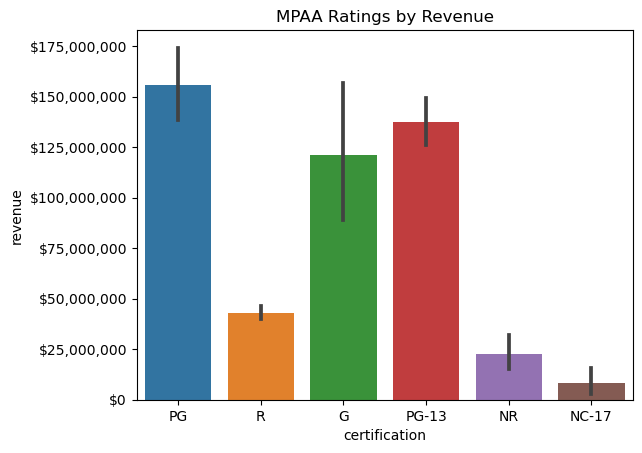

In [31]:
# Plot 
ax = sns.barplot(x=df['certification'], y = df['revenue'])
ax.set_title('MPAA Ratings by Revenue')
ax.yaxis.set_major_formatter('${x:,.0f}');

## Q1: Conclusion

- This Kruskal-Wallis Test results reject the Null Hypothesis and support the Alternative Hypothesis.
- indicating that there is a significant difference in revenue between MPAA Ratings.
- This plot show us the average revenue for each MPAA Rating(certification).
- Movies rated PG have the highest revenue, secondly being PG-13 and thirdly being rated G.

## Question 2: (Independent)
Do movies that are over 2.5 hours long earn more revenue than movies that are 1.5 hours long (or less)?

Hypothesis Testing Statement:
- Null Hypothesis: There is no significant difference in revenue earned for movies that are => 2.5hrs long and those that are =<1.5hrs long.
- Alternative Hypothesis: There is a significant difference in revenue earned for movies that are => 2.5hrs long and those that are =<1.5hrs long.

Hypothesis Test:
- alpha = 0.05
- 2 Sample T-test(Independent) because we are looking at two samples and testing the earned revenue which is numeric. 
- Assumptions; No Outliers, Normality and Equal Variance
    - If Lenene's. test does not passed, we will use Welch's T-test: equal_var= False to the ttest_ind

In [32]:
df.head()

,imdb_id,adult,belongs_to_collection,budget,popularity,revenue,runtime,title,vote_average,vote_count,...,Genre_History,Genre_Family,Genre_Mystery,Genre_Western,Genre_War,Genre_TV Movie,Genre_Documentary,year,month,day
3,tt0118694,0.0,True,150000.0,24.758,14204632.0,99.0,In the Mood for Love,8.112,2245.0,...,False,False,False,False,False,False,False,2000.0,9.0,29.0
10,tt0120467,0.0,False,120000.0,3.153,14904.0,87.0,Vulgar,5.500,44.0,...,False,False,False,False,False,False,False,2002.0,4.0,26.0
12,tt0120630,0.0,True,45000000.0,37.990,224834564.0,84.0,Chicken Run,6.747,4397.0,...,False,True,False,False,False,False,False,2000.0,6.0,23.0
15,tt0120753,0.0,False,8000000.0,8.635,105983.0,122.0,The Million Dollar Hotel,5.900,283.0,...,False,False,False,False,False,False,False,2000.0,2.0,9.0
16,tt0120755,0.0,True,125000000.0,47.963,546388105.0,123.0,Mission: Impossible II,6.115,5885.0,...,False,False,False,False,False,False,False,2000.0,5.0,24.0


In [33]:
# Create columns
df['over_two_half'] = df['runtime'] >= 150.0
df['under_one_half'] = df['runtime'] <= 90.0
df.head(2)

,imdb_id,adult,belongs_to_collection,budget,popularity,revenue,runtime,title,vote_average,vote_count,...,Genre_Mystery,Genre_Western,Genre_War,Genre_TV Movie,Genre_Documentary,year,month,day,over_two_half,under_one_half
3,tt0118694,0.0,True,150000.0,24.758,14204632.0,99.0,In the Mood for Love,8.112,2245.0,...,False,False,False,False,False,2000.0,9.0,29.0,False,False
10,tt0120467,0.0,False,120000.0,3.153,14904.0,87.0,Vulgar,5.500,44.0,...,False,False,False,False,False,2002.0,4.0,26.0,False,True


In [34]:
df['over_two_half'].value_counts()

False    4939
True      146
Name: over_two_half, dtype: int64

In [35]:
df['under_one_half'].value_counts()

False    4258
True      827
Name: under_one_half, dtype: int64

In [36]:
# Filtering movie runtimes into DFs
two_half_df = df.loc[df['over_two_half']== True, ['revenue', 'over_two_half']]
one_half_df = df.loc[df['under_one_half']== True, ['revenue', 'under_one_half']]
# Filter out feature
two_half_rev = two_half_df['revenue']
one_half_rev = one_half_df['revenue']
# check the qty in each group
display(len(two_half_rev), len(one_half_rev))

146

827

### No Outliers Assumption

In [37]:
# Outliers
zscores_s = stats.zscore(two_half_rev)
outliers_s = abs(zscores_s)>3
np.sum(outliers_s)

2

In [38]:
# Remove Outliers
two_half_rev_cln = two_half_rev[(np.abs(stats.zscore(two_half_rev)) < 3)]

In [39]:
# Outliers
zscores_s = stats.zscore(one_half_rev)
outliers_s = abs(zscores_s)>3
np.sum(outliers_s)

21

In [40]:
# Remove Outliers
one_half_rev_cln = one_half_rev[(np.abs(stats.zscore(one_half_rev)) < 3)]

- Outliers have been removed

### Normality Assumption

In [41]:
# Normality
result_two = stats.normaltest(two_half_rev_cln)
print(result_two)
# Is the p-value less than 0.05?
result_two.pvalue < .05

NormaltestResult(statistic=36.88614829183344, pvalue=9.7785546910993e-09)


True

In [42]:
# Normality
result_one = stats.normaltest(one_half_rev_cln)
print(result_one)
# Is the p-value less than 0.05?
result_one.pvalue < .05

NormaltestResult(statistic=422.42905114315926, pvalue=1.865078202538238e-92)


True

In [43]:
display(len(one_half_rev_cln), len(two_half_rev_cln))

806

144

- The samples distribution is not normal as our p-value is less than alpha, so we reject the null hypothesis.
- Since we have more than 20 in each sample we will continue with our last assumption.

### Equal Variance Assumption

In [44]:
# Equal Variance
result = stats.levene(one_half_rev_cln, two_half_rev_cln)
print(result)
# is the p-value less than 0.05?
result.pvalue < .05

LeveneResult(statistic=306.7896301431821, pvalue=1.005588991776251e-59)


True

- P-value is less than alpha which indicates we do not have Equal Variance in our samples. Therefore, we reject the null hypothesis and we can proceed by using the Welch's T-Test.

### Test

In [45]:
# Welch's T-test
# Independent t-test with equal_var set to False

result = stats.ttest_ind(one_half_rev_cln, two_half_rev_cln, equal_var = False)
print(result)
# is the p-value less than 0.05?
result.pvalue < .05

Ttest_indResult(statistic=-7.8013777901294805, pvalue=1.1267821166347905e-12)


True

### Visualization

In [46]:
# Change column name to concat for plot 
two_half_df.rename(columns={'over_two_half': 'time'}, inplace = True)

In [47]:
# filter out true values
filter1 = two_half_df['time']==True

In [48]:
# change True values to 150
two_half_df.loc[filter1, 'time']=150

In [49]:
two_half_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 155 to 60031
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   revenue  146 non-null    float64
 1   time     146 non-null    object 
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


In [50]:
# change column name to the same as other for concat to then plot
one_half_df.rename(columns={'under_one_half': 'time'}, inplace = True)

In [51]:
# filter out true values
filter2 = one_half_df['time']==True

In [52]:
# change true values to 90
one_half_df.loc[filter2, 'time']=90

In [53]:
# creat plot df with both dfs 90 & 150 concated
plot_df = pd.concat([two_half_df, one_half_df])
plot_df

,revenue,time
155,465361176.0,150
237,215294342.0,150
587,4900000.0,150
788,20908467.0,150
1257,871368364.0,150
...,...,...
59325,50.0,90
59404,1150.0,90
59877,431020.0,90
60200,8756.0,90


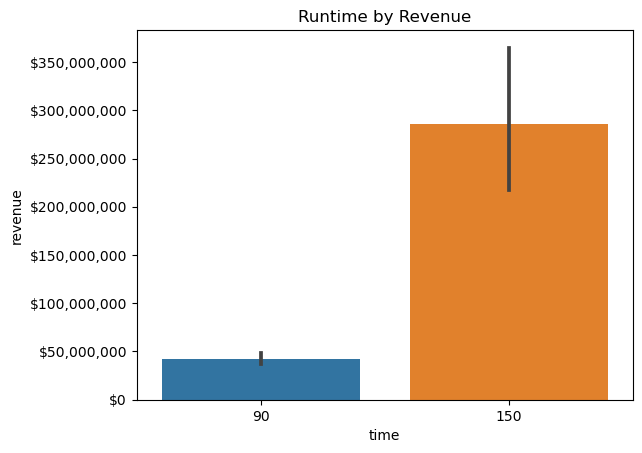

In [54]:
# Plot 
ax = sns.barplot(data=plot_df, x= 'time', y = 'revenue')
ax.set_title('Runtime by Revenue')
ax.yaxis.set_major_formatter('${x:,.0f}');

### Q2: Conclusion

- Welch's T-Test gave the p-value of less than alpha, therefore we reject the null hypothesis and support the alternative hypothesis.
- There is a significant difference of revenue for movies with a runtime of >=2.5 hours and <=1.5 hours.
- With our plot we can see there is a greater earned revenue with movies 2.5 and over.

## Question Three: (Independent)
Do movies released in 2020 earn less revenue than movies released in 2018?
- How do the years compare for movie ratings?

Hypothesis Testing Statements:

- Null Hypothesis: Movie released in 2020 and those released in 2018 do not have a significant difference in revenue earned.

- Alternative Hypothesis: There is a significant difference in revenue earned for movie released in 2020 compared to those released in 2018.

Hypothesis Test:

- alpha = 0.05
- Independent, 2 sample test, because there are two groups and the revenue we are testing is numeric.
- Assumptions: No Outliers, Normality and Equal Variance
    - If assumptions fail: use Welch's T- test; equal_var = False

In [55]:
df.head(2)

,imdb_id,adult,belongs_to_collection,budget,popularity,revenue,runtime,title,vote_average,vote_count,...,Genre_Mystery,Genre_Western,Genre_War,Genre_TV Movie,Genre_Documentary,year,month,day,over_two_half,under_one_half
3,tt0118694,0.0,True,150000.0,24.758,14204632.0,99.0,In the Mood for Love,8.112,2245.0,...,False,False,False,False,False,2000.0,9.0,29.0,False,False
10,tt0120467,0.0,False,120000.0,3.153,14904.0,87.0,Vulgar,5.500,44.0,...,False,False,False,False,False,2002.0,4.0,26.0,False,True


In [56]:
# filter out the two groups; 2020, 2018
twty_df = df.loc[df['year'] == 2020,['revenue', 'year']]
eight_df = df.loc[df['year'] == 2018, ['revenue', 'year']]

twty_rev = twty_df['revenue']
eight_rev = eight_df['revenue']

display(len(twty_rev), len(eight_rev))

129

211

### No Outliers Assumption

In [57]:
# Outliers 2020
zscores_f = stats.zscore(twty_rev)
outliers_f = abs(zscores_f)>3
np.sum(outliers_f)

4

In [58]:
# Remove Outliers
twty_rev = twty_rev[(np.abs(stats.zscore(twty_rev)) < 3)]

In [59]:
# Outliers 2018
zscores_f = stats.zscore(eight_rev)
outliers_f = abs(zscores_f)>3
np.sum(outliers_f)

5

In [60]:
# Remove Outliers
eight_rev = eight_rev[(np.abs(stats.zscore(eight_rev)) < 3)]

### Normality Assumption

In [61]:
# Normality
result_twty = stats.normaltest(twty_rev)
print(result_twty)
# Is the p-value less than 0.05?
result_twty.pvalue < .05

NormaltestResult(statistic=118.43715910101781, pvalue=1.9129238198848022e-26)


True

In [62]:
# Normality
result_eight = stats.normaltest(eight_rev)
print(result_eight)
# Is the p-value less than 0.05?
result_eight.pvalue < .05

NormaltestResult(statistic=124.12670418875962, pvalue=1.1123172105770627e-27)


True

In [63]:
display(len(twty_rev), len(eight_rev))

125

206

- Distributions are not normal, however we still have more than 15 in each sample after removing outliers so we can still continue to test our next assumption. 

### Equal Variance Assumption

In [64]:
# Equal Variance
result =stats.levene(twty_rev, eight_rev)
print(result)
# is the p-value less than 0.05?
result.pvalue < .05

LeveneResult(statistic=22.061472101096985, pvalue=3.8844664717434635e-06)


True

- There is no equal variance in our samples so w will proceed with the non-Parametric test; Welch's T-test.
- Our p-value being less than alpha rejects the null hypothesis.

### Test

In [65]:
# non- Parametric test, no longer the ANOVA test because equal variance test did not pass.
result = stats.ttest_ind(twty_rev, eight_rev, equal_var = False)
print(result)
# is the p-value less than 0.05?
result.pvalue < .05

Ttest_indResult(statistic=-6.030696321866577, pvalue=5.997876017817936e-09)


True

- Welch's test has a p-value less than alpha, so we reject the null hypothesis and support the alternative hypothesis.
- The two samples have significant differences.

### Visualization

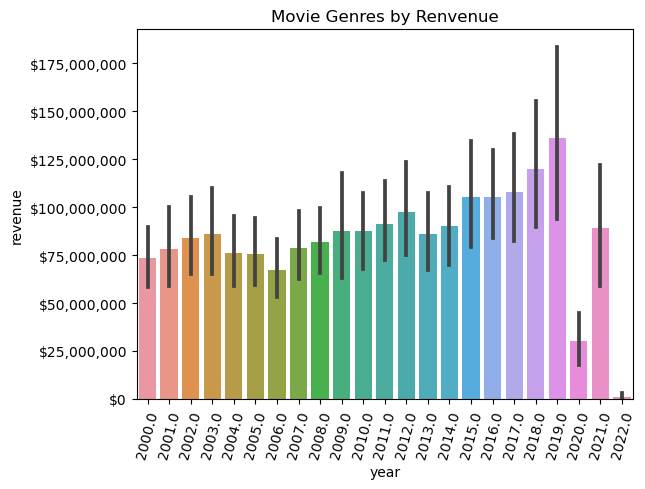

In [66]:
# Plot 
ax = sns.barplot(x=df['year'], y = df['revenue'])
ax.set_title('Movie Genres by Renvenue')
ax.set_xticklabels(ax.get_xticklabels(), rotation=75);
ax.yaxis.set_major_formatter('${x:,.0f}');

### Q3: Conclusion

- According to our Welches test we do have a significant difference in revenue earned when comparing 2018 and 2020. Supporting the Alternative Hypothesis. 
- When looking at our plot we can see the 2018 is significantly higher in earned revenue than 2020. 
- We also see that 2019 is the year that earned the highest revenue. 